# Data Collector

In [4]:
import datetime as dt
import numpy as np
import matplotlib.dates as md
import matplotlib.pyplot as plt

class Metric():
    def __init__(self, type, column):
        self.type = type.upper()
        self.column = column
        self.__content = []
    # Content getter && setter
    def setContent(self, data, line):
        if self.type == "NUMERIC":
            return self.__content.append( float (data[line][self.column].replace(",", ".").replace(" ", "0")) )
        elif self.type == "DATE":
            time = data[line][self.column]
            return self.__content.append(dt.datetime.strptime(time, "%d/%m/%Y %H:%M"))
    def getContent(self):
        return self.__content
class DataBase():
    def __init__(self, metrics):
        self.__metrics = metrics
    # Data getter && setter
    def setData(self, filename):
        file = open(filename, "r", encoding="UTF-8")
        data = [line.rstrip("\n") for line in file]
        data = [words.split("\t") for words in data]
        file.close()
        self.__data = data
    def getData(self):
        return self.__data
    # Metrics getter
    def getMetrics(self, metrics):
        return self.__metrics
    # Custom methods
    def fillMetrics(self):
        for metric in self.__metrics:
            for line in range(1, len(self.__data)):
                metric.setContent(self.__data, line)



# Data Viewer

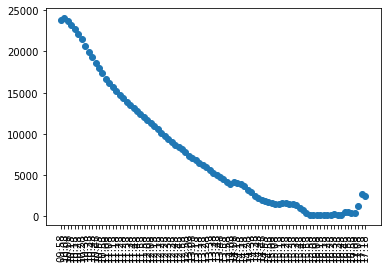

In [5]:
def mbViewer():
    # Metrics
    time = Metric("Date", 0)
    free = Metric("Numeric", 1)
    cpu = Metric("Numeric", -2)
    commited = Metric("Numeric", -1)
    # Db
    dataBaseMetrics = [time, free, cpu, commited]
    dataBase = DataBase(dataBaseMetrics)
    dataBase.setData("collector-input/Data.tsv")
    dataBase.fillMetrics()

    # Mb Graphic
    time = time.getContent()
    freeMb = free.getContent()
    del freeMb[89:] ; del time[89:]

    ax=plt.gca()
    ax.set_xticks(time)
    ax.xaxis.set_major_formatter(md.DateFormatter("%H:%M"))
    plt.xticks(rotation=90)

    plt.scatter(time,freeMb)
    plt.show()
mbViewer()